In [1]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

from torch import nn
from torchinfo import summary
import matplotlib.pyplot as plt
import sys
from torchinfo import summary

# local imports
from utils import *
from train_model import *
from data import *

import cnn

torch version: 2.0.0+cu117
torchvision version: 0.15.1+cu117


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
image_path = './dataset/'

train_dir = image_path+"train"
test_dir = image_path+"test"

train_dir, test_dir

('./dataset/train', './dataset/test')

In [4]:
walk_through_dir(train_dir)

There are 10 directories and 0 images in './dataset/train'.
There are 0 directories and 800 images in './dataset/train\Atopic Dermatitis'.
There are 0 directories and 800 images in './dataset/train\Basal Cell Carcinoma (BCC)'.
There are 0 directories and 800 images in './dataset/train\Benign Keratosis-like Lesions (BKL)'.
There are 0 directories and 800 images in './dataset/train\Eczema'.
There are 0 directories and 800 images in './dataset/train\Melanocytic Nevi (NV)'.
There are 0 directories and 800 images in './dataset/train\Melanoma'.
There are 0 directories and 800 images in './dataset/train\Psoriasis'.
There are 0 directories and 800 images in './dataset/train\Seborrheic Keratoses'.
There are 0 directories and 800 images in './dataset/train\Tinea Ringworm Candidiasis'.
There are 0 directories and 800 images in './dataset/train\Warts Molluscum and other Viral Infections'.


In [5]:
walk_through_dir(test_dir)

There are 10 directories and 0 images in './dataset/test'.
There are 0 directories and 200 images in './dataset/test\Atopic Dermatitis'.
There are 0 directories and 200 images in './dataset/test\Basal Cell Carcinoma (BCC)'.
There are 0 directories and 200 images in './dataset/test\Benign Keratosis-like Lesions (BKL)'.
There are 0 directories and 200 images in './dataset/test\Eczema'.
There are 0 directories and 200 images in './dataset/test\Melanocytic Nevi (NV)'.
There are 0 directories and 200 images in './dataset/test\Melanoma'.
There are 0 directories and 200 images in './dataset/test\Psoriasis'.
There are 0 directories and 200 images in './dataset/test\Seborrheic Keratoses'.
There are 0 directories and 200 images in './dataset/test\Tinea Ringworm Candidiasis'.
There are 0 directories and 200 images in './dataset/test\Warts Molluscum and other Viral Infections'.


In [6]:
IMG_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [7]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = create_dataloader(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x2e48d55deb0>,
 ['Atopic Dermatitis',
  'Basal Cell Carcinoma (BCC)',
  'Benign Keratosis-like Lesions (BKL)',
  'Eczema',
  'Melanocytic Nevi (NV)',
  'Melanoma',
  'Psoriasis',
  'Seborrheic Keratoses',
  'Tinea Ringworm Candidiasis',
  'Warts Molluscum and other Viral Infections'])

In [8]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(8))

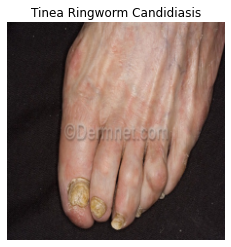

In [9]:
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

In [11]:
cnn_model = cnn.SimpleCNN()
print(cnn_model)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (relu4): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias

In [12]:
summary(model=cnn_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleCNN (SimpleCNN)                    [32, 3, 224, 224]    [32, 10]             --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 16, 224, 224]   448                  True
├─BatchNorm2d (bn1)                      [32, 16, 224, 224]   [32, 16, 224, 224]   32                   True
├─ReLU (relu1)                           [32, 16, 224, 224]   [32, 16, 224, 224]   --                   --
├─MaxPool2d (pool1)                      [32, 16, 224, 224]   [32, 16, 112, 112]   --                   --
├─Conv2d (conv2)                         [32, 16, 112, 112]   [32, 32, 112, 112]   4,640                True
├─BatchNorm2d (bn2)                      [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
├─ReLU (relu2)                           [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
├─MaxPool2d (pool2) 

In [13]:
optimizer = torch.optim.Adam(params=cnn_model.parameters(), 
                             lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()
set_seed()
results = train(model=cnn_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\collate.py", line 264, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\collate.py", line 119, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\utils\data\_utils\collate.py", line 160, in collate_tensor_fn
    storage = elem._typed_storage()._new_shared(numel, device=elem.device)
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py", line 709, in _new_shared
    untyped_storage = torch.UntypedStorage._new_shared(size * self._element_size(), device=device)
  File "c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py", line 222, in _new_shared
    return cls._new_using_filename_cpu(size)
RuntimeError: Couldn't open shared file mapping: <000001A556C624D2>, error code: <1455>
